<PolarAxesSubplot:>

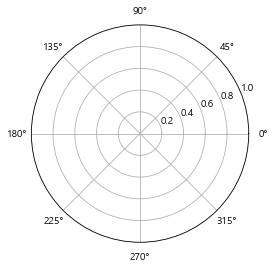

In [1]:
# 극 좌표
import matplotlib.pyplot as plt

plt.subplot(111,
            polar=True          # 극좌표
            )

<BarContainer object of 1 artists>

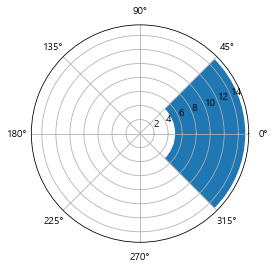

In [2]:
import numpy as np

plt.subplot(111, polar=True)
plt.bar(x=0, height=10, width=np.pi/2, bottom=5)

In [3]:
# 데이터
import pandas as pd

df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

df.head(3)

,Name,Value
0,item 1,85
1,item 2,77
2,item 3,31


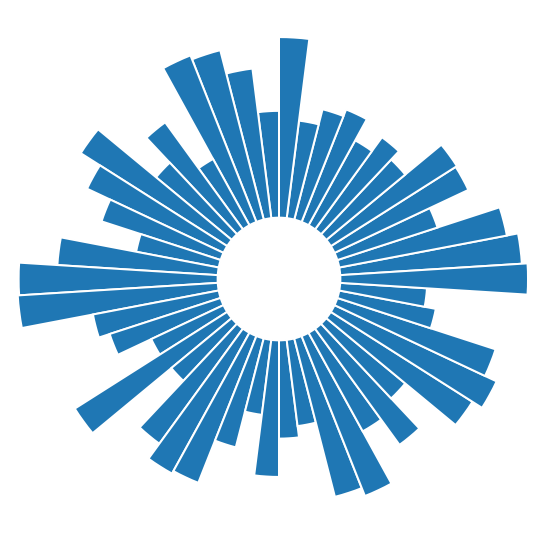

In [4]:
# 원형 막대 차트
plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)

plt.axis('off')

upperLimit = 100
lowerLimit = 30

max = df['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

width = 2*np.pi / len(df.index)

indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

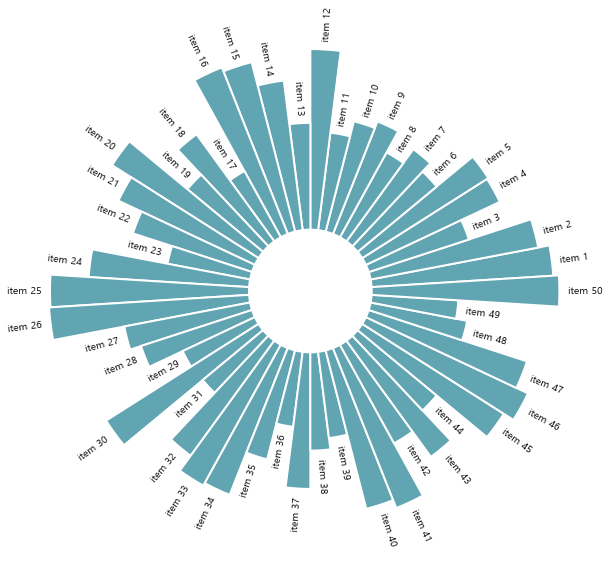

In [5]:
# 레이블 추가
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

labelPadding = 4

for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

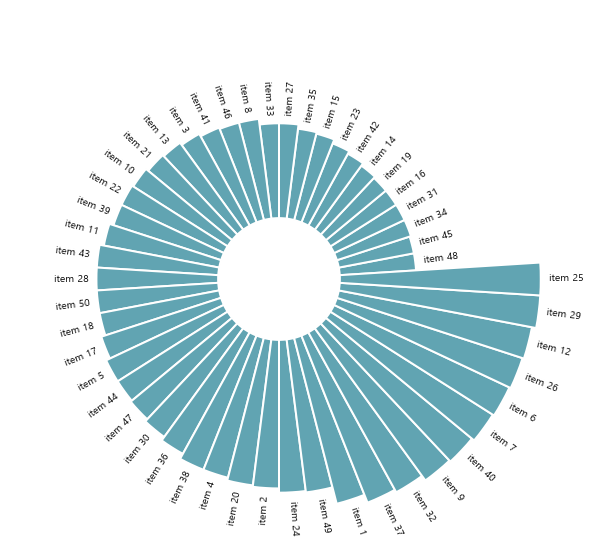

In [6]:
# 정렬된 막대 차트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

df = df.sort_values(by=['Value'])

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30
labelPadding = 4

max = df['Value'].max()

slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

width = 2*np.pi / len(df.index)

indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [9]:
# 그룹 데이터
rng = np.random.default_rng()
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

df.head(3)

,name,value,group
0,item 1,83,A
1,item 2,51,A
2,item 3,60,A


In [10]:
# 레이블의 회전및 정렬 함수
def get_label_rotation(angle, offset):
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

# 레이블을 추가하는 함수
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

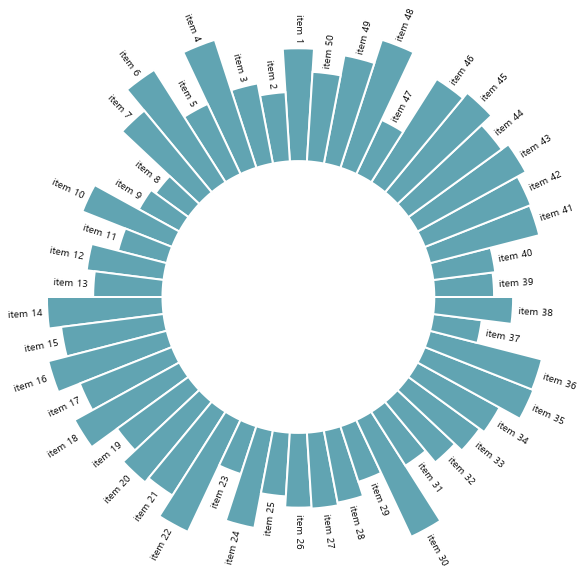

In [11]:
# 레이블이 있는 원형 막대 차트
ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

WIDTH = 2 * np.pi / len(VALUES)

OFFSET = np.pi / 2

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)

ax.set_ylim(-100, 100)

ax.set_frame_on(False)

ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

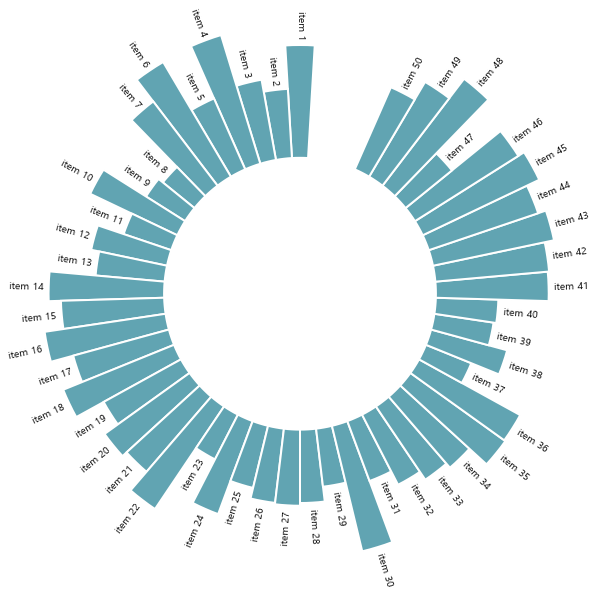

In [12]:
# 원의 빈 공간(간격) 추가
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

IDXS = slice(0, ANGLES_N - PAD)

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

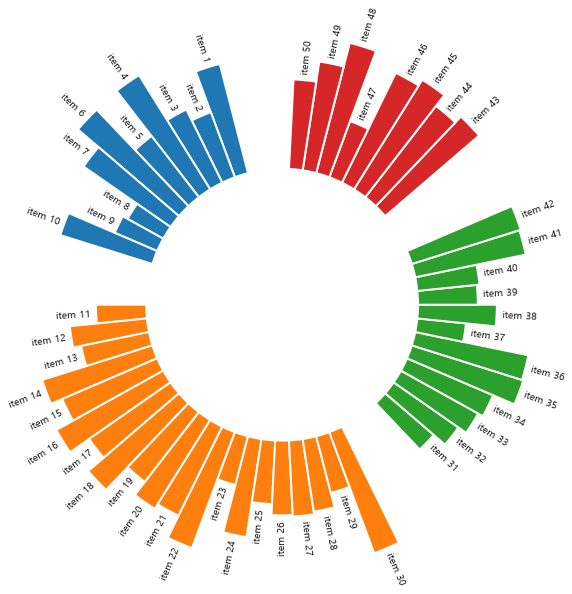

In [13]:
# 그룹간 간격 및 색상 설정
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

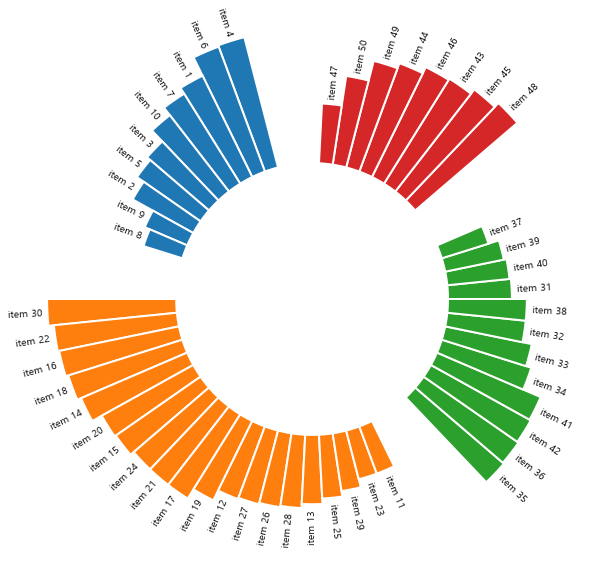

In [14]:
# 그룹간 정렬된 원형 막대 그래프
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)

VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]


offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)